# Tugas KTP Cuda - CPU
## Anggota Kelompok
### Fahrel Gibran Alghany - 24060120130106
### Rif'an Fatoni Febrianto - 24060120130073
### M. Fiqih Ikhsan - 24060120140097

# Setup

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

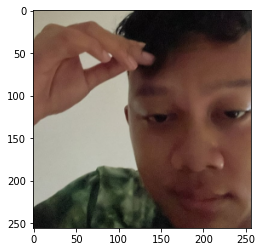

In [4]:
# Import image
image256 = plt.imread('256.png')
plt.imshow(image256)

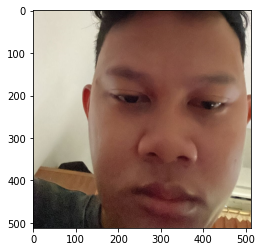

In [5]:
# Import image
image512 = plt.imread('512.png')
plt.imshow(image512)

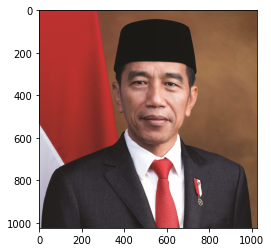

In [6]:
# Import image
image1024 = plt.imread('1024.png')
plt.imshow(image1024)

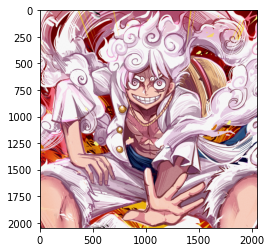

In [7]:
# Import image
image2048 = plt.imread('2048.png')
plt.imshow(image2048)

# Problem Set 1

In [13]:
# Create weight for grayscale image
weight_gray = np.array([[0.299, 0.587, 0.114]], dtype=np.float32)

In [14]:
# Convert image from uint8 to float32
image256 = image256.astype(np.float32)
image512 = image512.astype(np.float32)
image1024 = image1024.astype(np.float32)
image2048 = image2048.astype(np.float32)

In [15]:
# Convert image to grayscale with CPU loop for each pixel calculate with weight
def grayscale_cpu(image, weight):
    image_gray = np.zeros((image.shape[0], image.shape[1]), dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_gray[i, j] = (weight[0, 0] * image[i, j, 0] + weight[0, 1] * image[i, j, 1] + weight[0, 2] * image[i, j, 2])
    return image_gray

256x256 grayscale image with CPU time:  0.10340380668640137 s


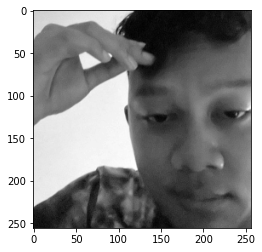

In [24]:
# Convert image to grayscale and calculate time
start_time = time.time()
image256_gray = grayscale_cpu(image256, weight_gray)
image256_gray_time = time.time() - start_time
print("256x256 grayscale image with CPU time: ", image256_gray_time, "s")
plt.imshow(image256_gray, cmap='gray')

Time for 512x512 image: 0.4701251983642578 seconds


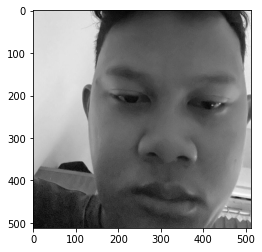

In [23]:
# Convert 512 image to grayscale and calculate time
start_time = time.time()
image512_gray = grayscale_cpu(image512, weight_gray)
image512_gray_time = time.time() - start_time
print("Time for 512x512 image: %s seconds" % (image512_gray_time))
plt.imshow(image512_gray, cmap='gray')

Time for 1024x1024 image: 1.618175983428955 seconds


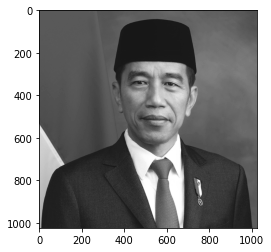

In [25]:
# Convert 1024 image to grayscale and calculate time
start_time = time.time()
image1024_gray = grayscale_cpu(image1024, weight_gray)
image1024_gray_time = time.time() - start_time
print("Time for 1024x1024 image: %s seconds" % (image1024_gray_time))
plt.imshow(image1024_gray, cmap='gray')

Time for 2048x2048 image: 6.3407135009765625 seconds


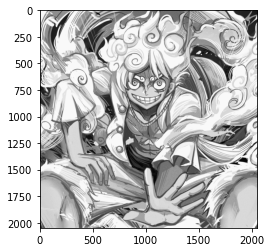

In [26]:
# Convert 2048 image to grayscale and calculate time
start_time = time.time()
image2048_gray = grayscale_cpu(image2048, weight_gray)
image2048_gray_time = time.time() - start_time
print("Time for 2048x2048 image: %s seconds" % (image2048_gray_time))
plt.imshow(image2048_gray, cmap='gray')

In [36]:
# Create a summary table for CPU
data = {'Image Size': ['256x256', '512x512', '1024x1024', '2048x2048'],
        'CPU Time (s)': [image256_gray_time, image512_gray_time, image1024_gray_time, image2048_gray_time]}
df = pd.DataFrame(data)
df

,Image Size,CPU Time (s)
0,256x256,0.103404
1,512x512,0.470125
2,1024x1024,1.618176
3,2048x2048,6.340714


# Problem Set 2

In [30]:
weight_blur = np.array([[0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005],
                        [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                        [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                        [0.020, 0.030, 0.035, 0.040, 0.035, 0.030, 0.020],
                        [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                        [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                        [0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005]], dtype=np.float32)

In [31]:
# Blur image with CPU loop for each pixel calculate with weight
def blur_cpu(image, weight):
    image_blur = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                sum = 0
                for m in range(weight.shape[0]):
                    for n in range(weight.shape[1]):
                        if i + m - 3 >= 0 and i + m - 3 < image.shape[0] and j + n - 3 >= 0 and j + n - 3 < image.shape[1]:
                            sum += weight[m, n] * image[i + m - 3, j + n - 3, k]
                image_blur[i, j, k] = sum
    return image_blur

Time for 256x256 image: 12.739080905914307 seconds


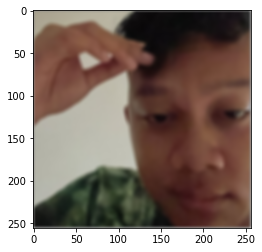

In [32]:
# Blur 256x256 image with CPU and calculate time
start_time = time.time()
image256_blur = blur_cpu(image256, weight_blur)
image256_blur_time = time.time() - start_time
print("Time for 256x256 image: %s seconds" % (image256_blur_time))
plt.imshow(image256_blur)

Time for 512x512 image: 66.78221917152405 seconds


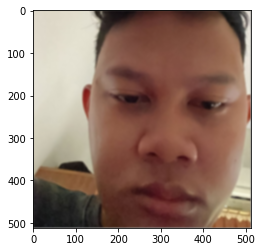

In [33]:
# Blur 512x512 image with CPU and calculate time
start_time = time.time()
image512_blur = blur_cpu(image512, weight_blur)
image512_blur_time = time.time() - start_time
print("Time for 512x512 image: %s seconds" % (image512_blur_time))
plt.imshow(image512_blur)

Time for 1024x1024 image: 272.58025765419006 seconds


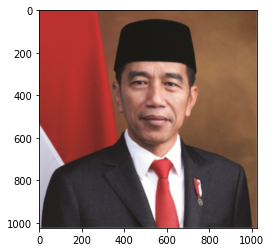

In [34]:
# Blur 1024x1024 image with CPU and calculate time
start_time = time.time()
image1024_blur = blur_cpu(image1024, weight_blur)
image1024_blur_time = time.time() - start_time
print("Time for 1024x1024 image: %s seconds" % (image1024_blur_time))
plt.imshow(image1024_blur)

Time for 2048x2048 image: 1016.0911159515381 seconds


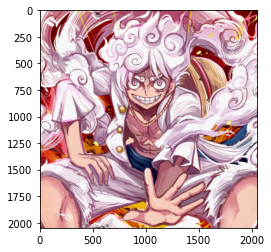

In [35]:
# Blur 2048x2048 image with CPU and calculate time
start_time = time.time()
image2048_blur = blur_cpu(image2048, weight_blur)
image2048_blur_time = time.time() - start_time
print("Time for 2048x2048 image: %s seconds" % (image2048_blur_time))
plt.imshow(image2048_blur)

In [37]:
# Create a summary table for CPU
data = {'Image Size': ['256x256', '512x512', '1024x1024', '2048x2048'],
        'CPU Time (s)': [image256_blur_time, image512_blur_time, image1024_blur_time, image2048_blur_time]}
df = pd.DataFrame(data)
df

,Image Size,CPU Time (s)
0,256x256,12.739081
1,512x512,66.782219
2,1024x1024,272.580258
3,2048x2048,1016.091116
